In [613]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

# Set visualization style
sns.set(style="whitegrid")



In [614]:
# Load datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# Merge datasets
#merged_trans_products = transactions_df.merge(products_df[['ProductID', 'Category', 'Price']], on='ProductID', how='left')
#transactions_df = transactions_df.merge(customers_df[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')



In [615]:
#print(merged_trans_products.head(10))

In [616]:
print(transactions_df.head(10))


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   
5        T00442      C0188      P067 2024-12-26 14:40:03         1   
6        T00490      C0195      P067 2024-11-24 11:49:48         3   
7        T00536      C0008      P067 2024-09-22 06:13:59         1   
8        T00564      C0157      P067 2024-12-07 17:57:40         3   
9        T00631      C0130      P067 2024-05-14 23:14:59         2   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
5      300.68  300.68  
6      902.04  300.68  
7      300.68  300.68  
8      902.04

In [617]:
print(transactions_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


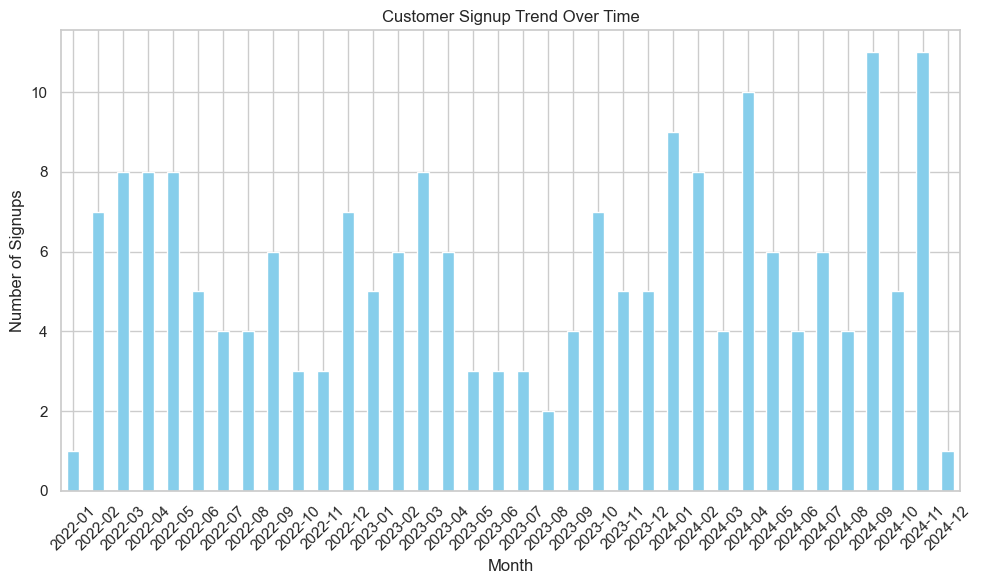

In [618]:
# Task 1: Exploratory Data Analysis (EDA)
## 1. Customer Signup Trends
signup_trend = customers_df['SignupDate'].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='bar', color='skyblue')
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



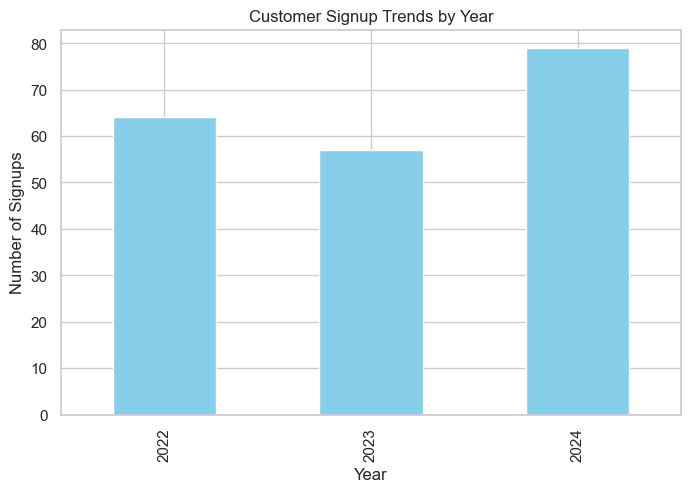

In [619]:
## 2. Customer Signup Trends by year
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
signup_year_segment = customers_df['SignupYear'].value_counts().sort_index()
signup_year_segment.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

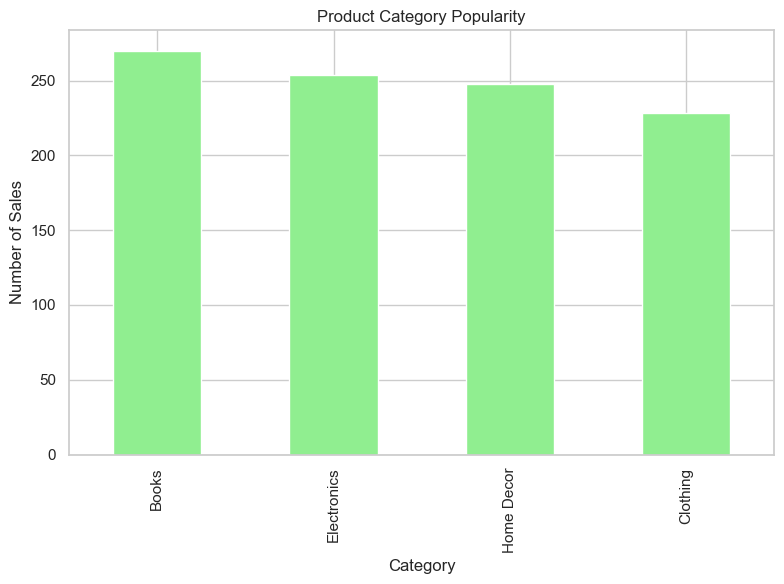

In [620]:
## 3. Product Category Popularity
merged_transactions = transactions_df.merge(products_df, on='ProductID', how='left')

category_sales = merged_transactions['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title("Product Category Popularity")
plt.xlabel("Category")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()



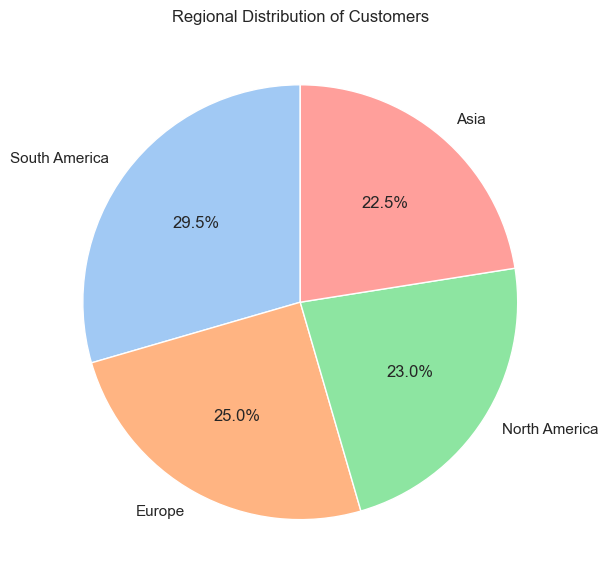

In [621]:
## 4. Regional Distribution of Customers
regional_distribution = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
regional_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Regional Distribution of Customers")
plt.ylabel("")
plt.tight_layout()
plt.show()



In [622]:
# Merge datasets
transactions_df = transactions_df.merge(products_df[['ProductID', 'Category', 'Price']], on='ProductID', how='left')
transactions_df = transactions_df.merge(customers_df[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')
print(transactions_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Category', 'Price_y', 'Region',
       'SignupDate'],
      dtype='object')


In [623]:
# Drop 'Price' and 'Price_y' columns
transactions_df = transactions_df.drop(columns=['Price_y'])

# Rename 'Price_x' to 'Price'
transactions_df = transactions_df.rename(columns={'Price_x': 'Price'})

print(transactions_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Category', 'Region', 'SignupDate'],
      dtype='object')


Asia                  697.591606
Europe                710.489872
North America         624.235246
South America         721.554474
Overall Mean Spend    689.995560
dtype: float64


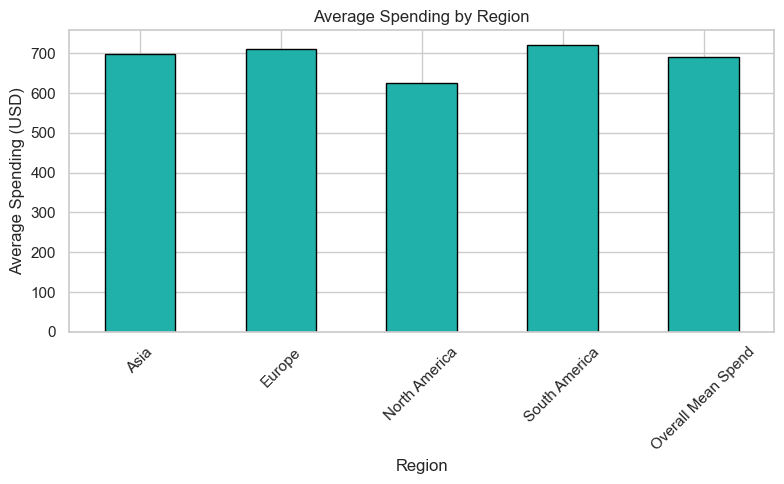

In [624]:
## 5. Calculate average spending by region
region_avg_spending = transactions_df.groupby('Region')['TotalValue'].mean()

# Calculate overall average spending (total mean value)
total_avg_spending = transactions_df['TotalValue'].mean()

# Add the total mean spending as a separate entry using pd.concat
region_avg_spending = pd.concat([region_avg_spending, pd.Series({'Overall Mean Spend': total_avg_spending})])

# Print the results
print(region_avg_spending)

# Plot the results
plt.figure(figsize=(8, 5))
region_avg_spending.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("Average Spending by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


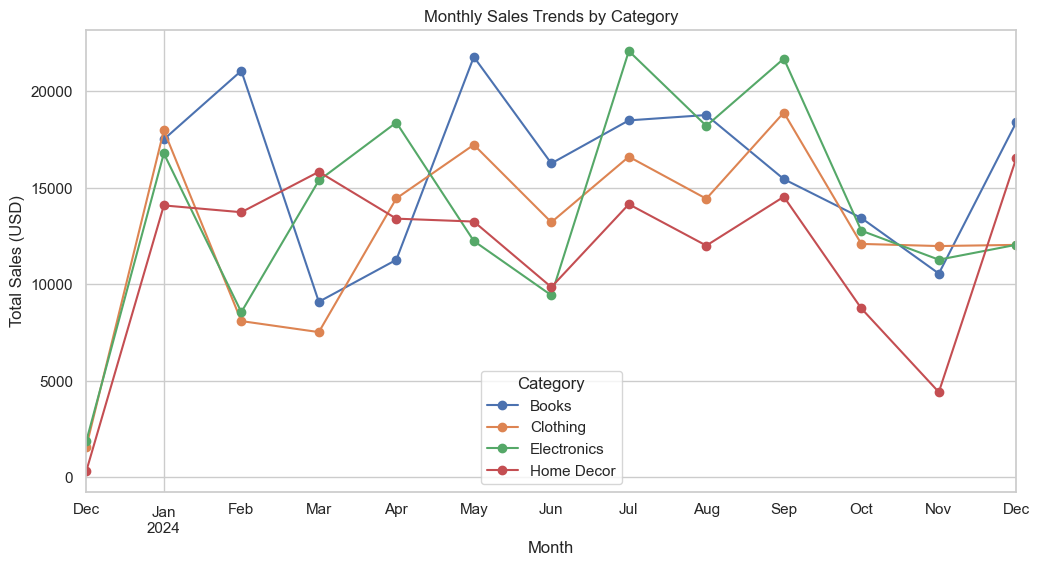

In [625]:
## 6. Monthly Sales Trends by Category
monthly_category_sales = transactions_df.groupby([transactions_df['TransactionDate'].dt.to_period('M'), 'Category'])['TotalValue'].sum().unstack()
monthly_category_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales Trends by Category")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category")
plt.grid(True)
plt.show()



Revenue Contribution by Product Category:
Books: $192147.47
Clothing: $166170.66
Electronics: $180783.50
Home Decor: $150893.93


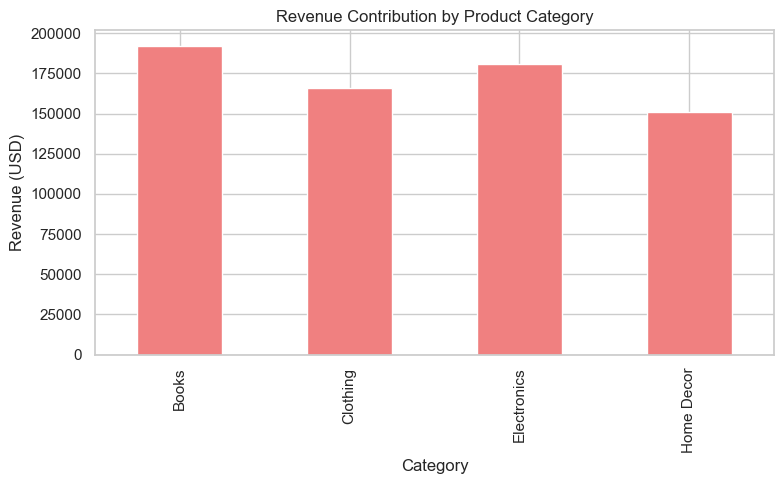

In [626]:
## 7. Revenue Contribution by Product Category
# Calculate revenue contribution by category
category_revenue = transactions_df.groupby('Category')['TotalValue'].sum()

# Print the revenue contribution by category
print("Revenue Contribution by Product Category:")
for category, revenue in category_revenue.items():
    print(f"{category}: ${revenue:.2f}")

# Plot the bar chart
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='lightcoral')
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()


Repeat Buyers: 187
One-Time Buyers: 12
Customers with No Purchases: 1


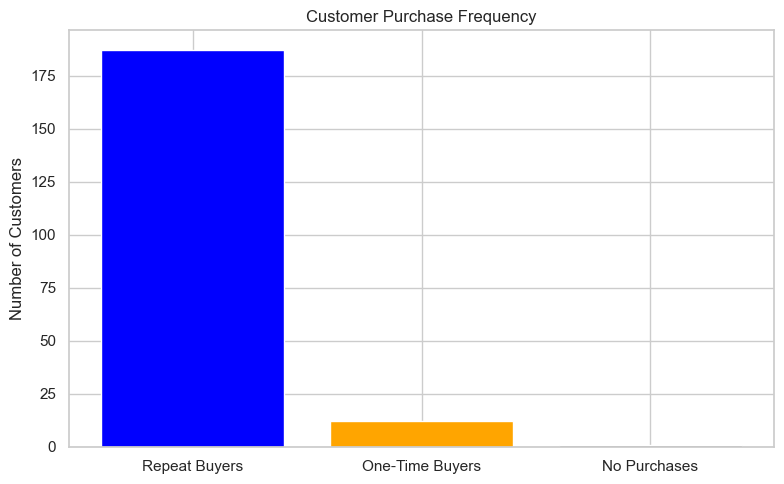

In [627]:
## 8. Repeat vs. One-Time Buyers
# Count purchase frequency
customer_purchase_frequency = transactions_df['CustomerID'].value_counts()

# Total number of customers (from customers_df)
total_customers = customers_df['CustomerID'].nunique()

# Repeat buyers: Customers who made more than 1 purchase
repeat_buyers = (customer_purchase_frequency > 1).sum()

# One-time buyers: Customers who made exactly 1 purchase
one_time_buyers = (customer_purchase_frequency == 1).sum()

# No purchases: Customers who are not in the transaction data
no_purchases = total_customers - len(customer_purchase_frequency)

# Print the counts
print(f"Repeat Buyers: {repeat_buyers}")
print(f"One-Time Buyers: {one_time_buyers}")
print(f"Customers with No Purchases: {no_purchases}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(['Repeat Buyers', 'One-Time Buyers', 'No Purchases'], 
        [repeat_buyers, one_time_buyers, no_purchases], 
        color=['blue', 'orange', 'gray'])
plt.title("Customer Purchase Frequency")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()



Regional Product Preferences (Total Sales by Region and Category):

Region: Asia
  Category: Books, Total Sales: $33119.03
  Category: Clothing, Total Sales: $49353.09
  Category: Electronics, Total Sales: $35658.15
  Category: Home Decor, Total Sales: $33944.70

Region: Europe
  Category: Books, Total Sales: $47464.42
  Category: Clothing, Total Sales: $36335.59
  Category: Electronics, Total Sales: $41562.60
  Category: Home Decor, Total Sales: $40892.02

Region: North America
  Category: Books, Total Sales: $41811.99
  Category: Clothing, Total Sales: $38038.49
  Category: Electronics, Total Sales: $44716.43
  Category: Home Decor, Total Sales: $27746.49

Region: South America
  Category: Books, Total Sales: $69752.03
  Category: Clothing, Total Sales: $42443.49
  Category: Electronics, Total Sales: $58846.32
  Category: Home Decor, Total Sales: $48310.72


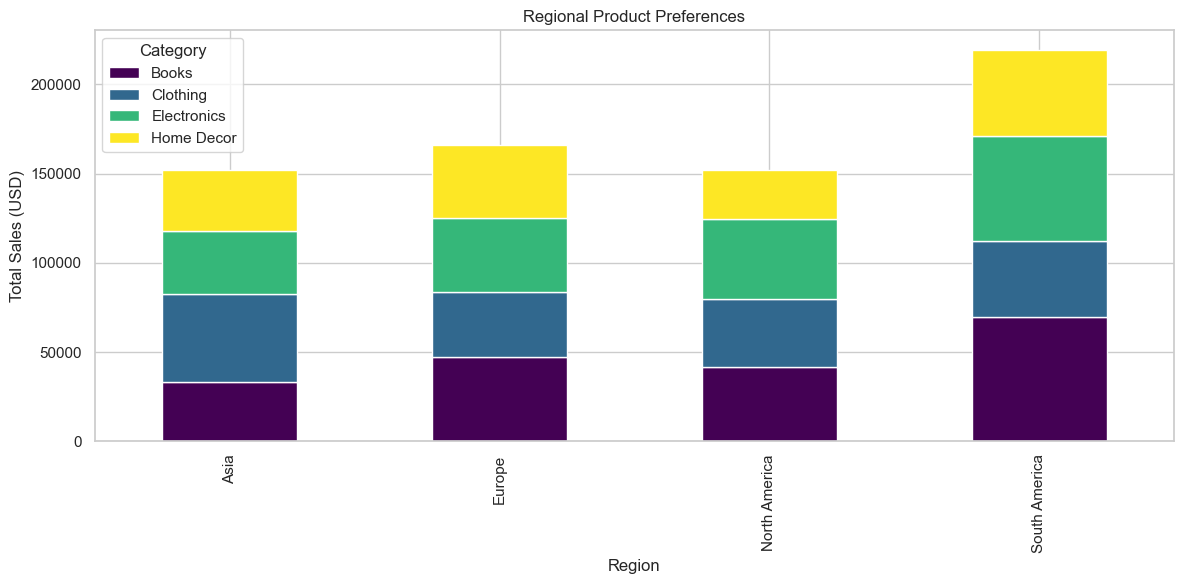

In [628]:
## 9. Regional Product Preferences
# Calculate regional product preferences (total sales by region and category)
region_product_preference = transactions_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# Print the revenue values for each region and category
print("Regional Product Preferences (Total Sales by Region and Category):")
for region in region_product_preference.index:
    print(f"\nRegion: {region}")  # Print the region as a heading
    for category, revenue in region_product_preference.loc[region].items():
        print(f"  Category: {category}, Total Sales: ${revenue:.2f}")  # Print category details

# Plot the bar chart
region_product_preference.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.title("Regional Product Preferences")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category")
plt.tight_layout()
plt.show()



0


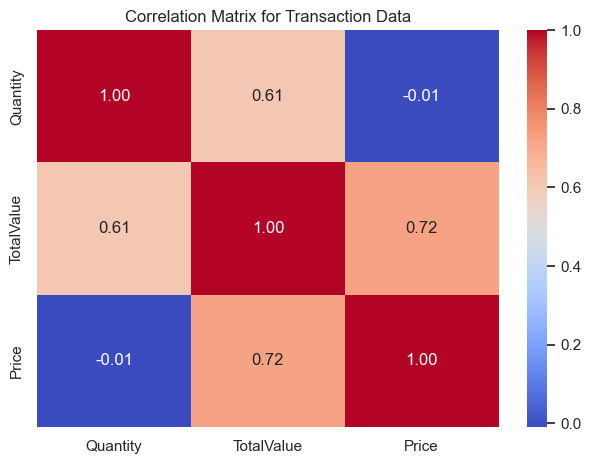

In [629]:
## 10. Correlation Analysis

# Check for missing values in the selected 'Price' column
print(transactions_df['Price'].isna().sum())

# Fill missing values, if any
transactions_df['Price'].fillna(0, inplace=True)

# Perform correlation analysis
correlation_matrix = transactions_df[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Transaction Data")
plt.tight_layout()
plt.show()

